# The chapter 6 exercises 

This only contains the exercises that require code to be solved

In [33]:
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import itertools
from statistics import mode, StatisticsError
from tqdm import tqdm_notebook as tqdm
from random import random, choice

## Question 7

In [51]:
N_SAMPLES = 10000
NOISE = 0.4
TEST_SIZE = 0.2
RANDOM_STATE = 42
N_ROWS_PER_SUBSET = 100
N_SUBSETS = 1000

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
X, y = make_moons(n_samples=N_SAMPLES, noise=NOISE)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

Normalized confusion matrix
The accuracy is: 0.845


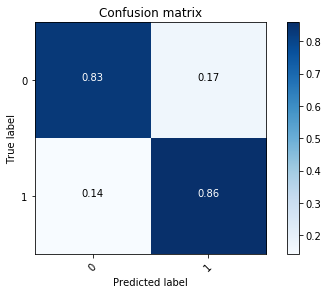

In [55]:
param_grid = {
    'max_leaf_nodes': [None, 2, 4, 6], 
    'max_depth': [None, 1, 3 ,5],
    'min_samples_leaf': [1, 3, 5, 7]
}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param_grid, scoring='accuracy')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cnf_mat = confusion_matrix(y_test, predictions)

plot_confusion_matrix(cnf_mat, classes=np.unique(y_train), normalize=True)
old_accuracy = sum(np.diag(cnf_mat)) / sum(cnf_mat.flatten())

print('The accuracy is: {0:.3f}'.format(old_accuaracy))

## Question 8

In [56]:
data = np.empty(shape=(N_SUBSETS, N_ROWS_PER_SUBSET, X.shape[1]))
labels = np.empty(shape=(N_SUBSETS, N_ROWS_PER_SUBSET))
data_with_labels = np.hstack((X_train, y_train.reshape(-1, 1)))

for i in range(N_SUBSETS):
    selected_values = data_with_labels[np.random.choice(data_with_labels.shape[0], N_ROWS_PER_SUBSET, replace=False)]
    selected_first_feature, selected_second_feature, selected_labels = selected_values.T 
    selected_features = np.vstack((selected_first_feature, selected_second_feature)).T
    
    data[i, :, :] = selected_features
    labels[i, :] = selected_labels
    

In [57]:
accuracies = []
classifiers = []

for row_index in tqdm(range(data.shape[0])):
    row_values = data[row_index, :, :]
    label_values = labels[row_index, :]
    
    param_grid = {
        'max_leaf_nodes': [None, 2, 4, 6], 
        'max_depth': [None, 1, 3 ,5],
        'min_samples_leaf': [1, 3, 5, 7]
    }

    dtc = DecisionTreeClassifier()
    clf = GridSearchCV(dtc, param_grid, scoring='accuracy')

    clf.fit(row_values, label_values)
    classifiers.append(clf)
    predictions = clf.predict(X_test)
    
    cnf_mat = confusion_matrix(y_test, predictions)
    accuracy = round(sum(np.diag(cnf_mat)) / sum(cnf_mat.flatten()), 2)
    
    accuracies.append(accuracy)
    
mean_accuracy = np.mean(np.array(accuracies))
print('The mean accuracy is: {0:.2f}'.format(mean_accuracy))


A Jupyter Widget


The mean accuracy is: 0.81


In [59]:
all_mode_predictions = []

for test_row_index in tqdm(range(X_test.shape[0])):
    test_row_values = X_test[test_row_index, :].reshape(1, -1)
    test_row_label = y_test[test_row_index].reshape(1,)
    predictions = []
    
    for classifier in classifiers:
        prediction = classifier.predict(test_row_values)[0]
        predictions.append(prediction)
    
    try:
        mode_prediction = mode(predictions)
    except StatisticsError as err:
        mode_prediction = choice(list(set(predictions)))
    
    all_mode_predictions.append(mode_prediction)

cnf_mat = confusion_matrix(y_test, np.array(all_mode_predictions))
new_accuracy = sum(np.diag(cnf_mat)) / sum(cnf_mat.flatten())
print('The new accuracy is: {0:.3f}'.format(new_accuracy))

A Jupyter Widget


The new accuracy is: 0.854


In [63]:
accuracy_improvement = new_accuracy - old_accuracy
print('Accuracy improvement: {0:.2f}%'.format(accuracy_improvement * 100))

Accuracy improvement: 0.85%
